In [209]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft, fftfreq,fft2,fftshift,idct
from scipy import fftpack
import scipy.fftpack as fp
from PIL import Image, ImageOps
from skimage import io

plt.rcParams.update({'font.size':14})

In [210]:
image_path = "C:/Users/javam/Desktop/UCD - Physics/year4/Labs/Lab 4/images-1/IMG_0007.jpg" #path to image
image = Image.open(image_path)

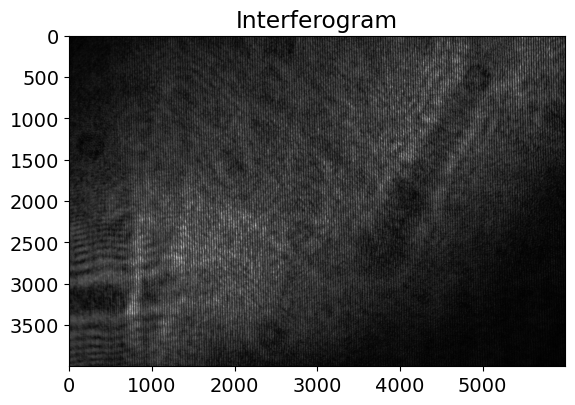

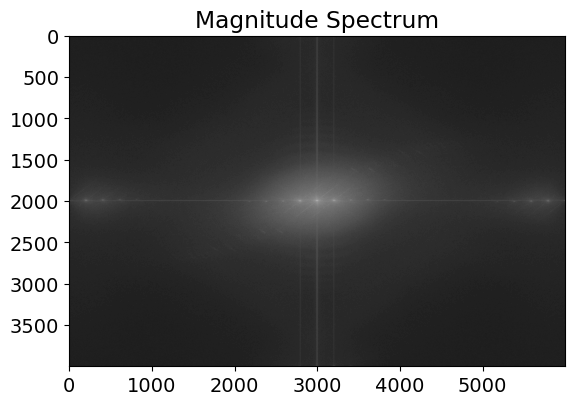

In [211]:
interferogram = io.imread(image_path, as_gray=True)

# Display the interferogram
plt.imshow(interferogram, cmap='gray')
plt.title('Interferogram')
plt.show()
fft_result = np.fft.fft2(interferogram)
fft_shifted = np.fft.fftshift(fft_result)

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fft_shifted)

# Display the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()
distance_between_fringes = 36 # Provide the distance in pixels

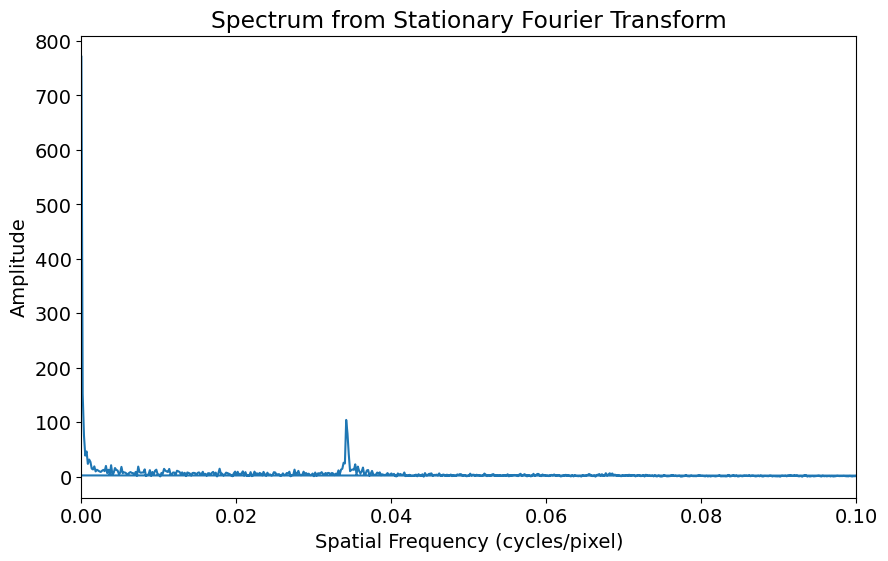

In [212]:
interferogram = io.imread(image_path, as_gray=True)

# Perform 1D Fourier Transform along a line in the image
spectrum = fft(fftshift(interferogram[2000, :]))

# Calculate the spatial frequencies in cycles per pixel
rows, cols = interferogram.shape
frequencies = np.fft.fftfreq(cols, 1)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(spectrum))
plt.title('Spectrum from Stationary Fourier Transform')
plt.xlabel('Spatial Frequency (cycles/pixel)')
plt.ylabel('Amplitude')
plt.xlim(0,.1)
plt.show()

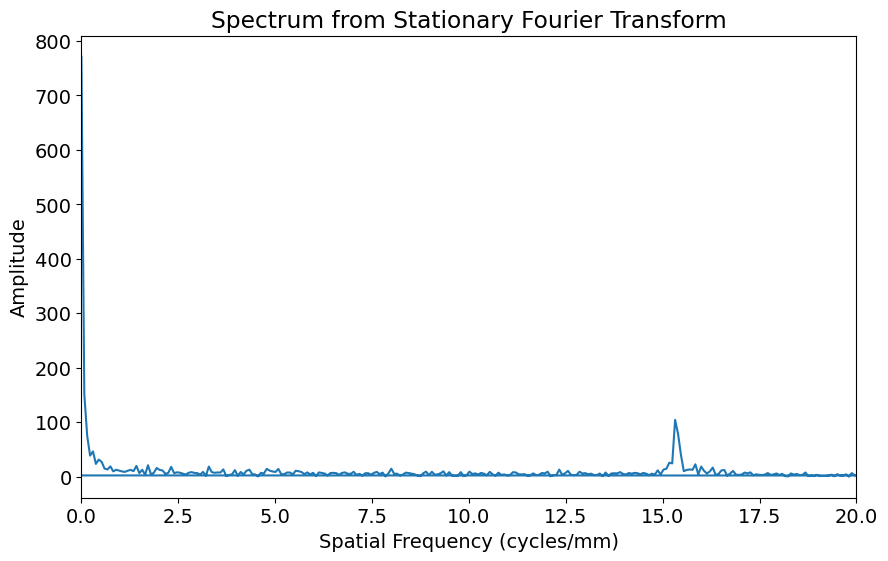

In [213]:
conversion_factor = 1 / .00223  # Adjust this based on your image scale

frequencies_mm = frequencies * conversion_factor

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies_mm, np.abs(spectrum))
plt.title('Spectrum from Stationary Fourier Transform')
plt.xlabel('Spatial Frequency (cycles/mm)')
plt.ylabel('Amplitude')
plt.xlim(0,20)

plt.show()

In [215]:
magnification = 2.42
ne = 1.55093
no = 1.54190
def getWavelength(spatialFreq):
    wl = (2*np.tan(45)*(ne-no)) / spatialFreq*magnification

    return wl

val_mm = (getWavelength(15.2)) #in cycle per mm

val_nm = val_mm*100000
print(val_nm)

465.7407806431353
